In [102]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [103]:
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)

In [104]:
len(x),len(y)

(1000, 1000)

In [105]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [106]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [107]:
import pandas as pd
df=pd.DataFrame({"X1":x[:,0],"X2":x[:,1],"label":y})
df.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


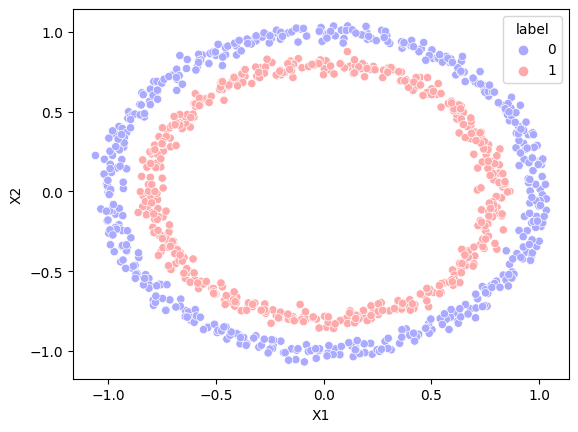

In [108]:
import seaborn as sns
sns.scatterplot(data=df,x="X1",y="X2",hue="label",palette="bwr")
plt.show()

In [109]:
x.shape

(1000, 2)

In [110]:
y.shape

(1000,)

In [111]:
type(x)

numpy.ndarray

In [112]:
type(y)

numpy.ndarray

In [113]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [114]:
import torch
torch.__version__

'2.1.0+cu118'

In [115]:
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [116]:
x

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [117]:
x.dtype

torch.float32

In [118]:
y.dtype

torch.float32

In [119]:
x.shape

torch.Size([1000, 2])

In [120]:
y.shape

torch.Size([1000])

In [121]:
from sklearn.model_selection import train_test_split
torch.manual_seed(42)

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)


In [123]:
x_train.shape,x_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

# building model

In [124]:
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [125]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)
    # self.two_linear_layers=nn.Sequential(nn.Linear(in_features=2,out_features=5),
    #                                      nn.Linear(in_features=5,out_features=1))

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0=CircleModel().to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [126]:
device

'cuda'

In [127]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [128]:
model_0=nn.Sequential( # model using sequential
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)).to(device)

In [129]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [130]:
with torch.inference_mode():


  untrained_preds=model_0(x_test.to(device))
print(f"predictions : {len(untrained_preds)},shape : {untrained_preds.shape}")

predictions : 200,shape : torch.Size([200, 1])


In [131]:
y_test[: 10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [132]:
untrained_preds[: 10]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

In [133]:
loss_fn=nn.BCEWithLogitsLoss() # loss function for binary classification
# loss_fn=nn.BCELoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

#calculate accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [134]:
#train model
with torch.inference_mode():


  y_logits=model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [135]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [136]:
y_preds=torch.round(y_pred_probs)
y_pred_labels=torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


In [137]:
#building traing and test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=100
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  #forward pass
  y_logits=model_0(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #calculate loss

  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))


    #calculate test loss

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10==0:
    print(f"Epoch : {epoch} | Loss : {loss:.2f} | Test Loss: {test_loss:.5f},Test acc : {test_acc:.2f}%")




Epoch : 0 | Loss : 0.70 | Test Loss: 0.69440,Test acc : 58.00%
Epoch : 10 | Loss : 0.70 | Test Loss: 0.69305,Test acc : 53.00%
Epoch : 20 | Loss : 0.69 | Test Loss: 0.69254,Test acc : 49.50%
Epoch : 30 | Loss : 0.69 | Test Loss: 0.69236,Test acc : 49.50%
Epoch : 40 | Loss : 0.69 | Test Loss: 0.69232,Test acc : 51.00%
Epoch : 50 | Loss : 0.69 | Test Loss: 0.69234,Test acc : 50.00%
Epoch : 60 | Loss : 0.69 | Test Loss: 0.69239,Test acc : 51.50%
Epoch : 70 | Loss : 0.69 | Test Loss: 0.69246,Test acc : 51.00%
Epoch : 80 | Loss : 0.69 | Test Loss: 0.69254,Test acc : 50.00%
Epoch : 90 | Loss : 0.69 | Test Loss: 0.69262,Test acc : 53.00%


In [138]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test.cpu().numpy(), test_pred.cpu().numpy())

print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[54 46]
 [48 52]]


In [139]:
import requests
from pathlib import Path
if Path("helper_funcions.py").is_file():
  print("helper function exists")
else:
  print("Download helper function")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

Download helper function


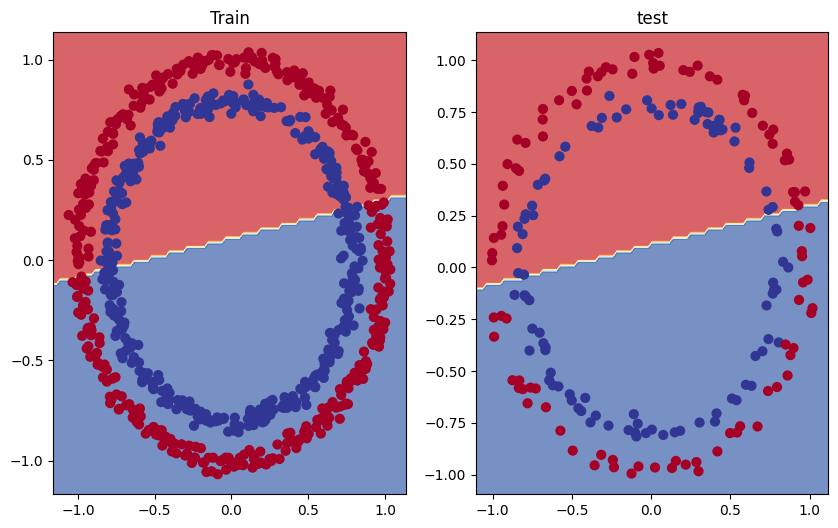

In [140]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,x_test,y_test)

# Model2

In [141]:
class circlemodelv1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)


  def forward(self,x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [142]:
model_1=circlemodelv1().to(device)

In [143]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

epochs=1000

#put data on target device
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_logits=model_1(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #calculate loss/acc

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_logits=model_1(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)


  if epoch%100==0:
    print(f"Epoch :{epoch} | loss:{loss:.4f}, Acc:{acc:.2f}% | test loss: {test_loss:.4f}, | test acc: {test_acc:.2f}% ")


Epoch :0 | loss:0.6940, Acc:50.88% | test loss: 0.6926, | test acc: 51.00% 
Epoch :100 | loss:0.6930, Acc:50.38% | test loss: 0.6938, | test acc: 48.00% 
Epoch :200 | loss:0.6930, Acc:51.12% | test loss: 0.6944, | test acc: 46.00% 
Epoch :300 | loss:0.6930, Acc:51.62% | test loss: 0.6946, | test acc: 45.00% 
Epoch :400 | loss:0.6930, Acc:51.12% | test loss: 0.6946, | test acc: 46.00% 
Epoch :500 | loss:0.6930, Acc:51.00% | test loss: 0.6947, | test acc: 46.00% 
Epoch :600 | loss:0.6930, Acc:51.00% | test loss: 0.6947, | test acc: 46.00% 
Epoch :700 | loss:0.6930, Acc:51.00% | test loss: 0.6947, | test acc: 46.00% 
Epoch :800 | loss:0.6930, Acc:51.00% | test loss: 0.6947, | test acc: 46.00% 
Epoch :900 | loss:0.6930, Acc:51.00% | test loss: 0.6947, | test acc: 46.00% 


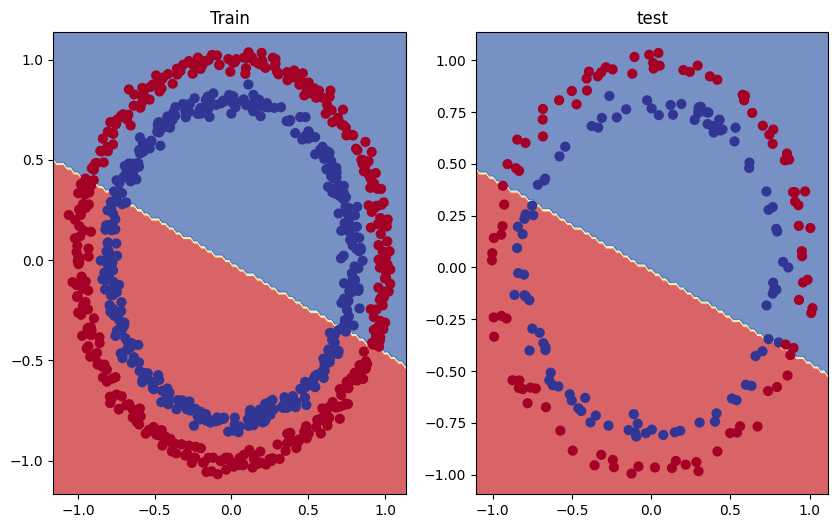

In [144]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,x_test,y_test)

In [145]:
weight=0.7
bias=0.3
start=0
end=1
step=0.01
x_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*x_regression+bias

print(len(x_regression))

100


In [146]:
x_regression[: 5],y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [147]:
train_split=int(0.8*len(x_regression))
x_train_re,y_train_re=x_regression[: train_split],y_regression[:train_split]
x_test_re,y_test_re=x_regression[train_split:],y_regression[train_split:]

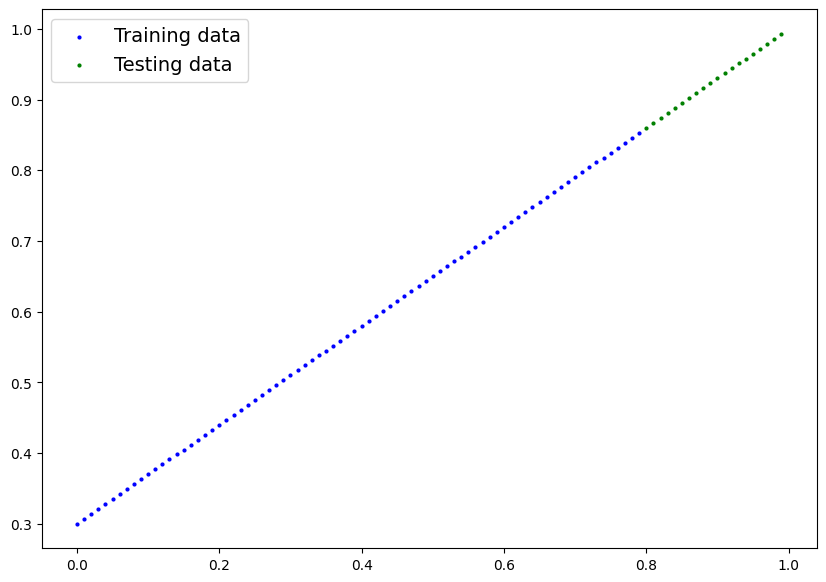

In [148]:
plot_predictions(train_data=x_train_re,train_labels=y_train_re,test_data=x_test_re,test_labels=y_test_re)

In [149]:
model_2=nn.Sequential(nn.Linear(in_features=1,out_features=10),
                      nn.Linear(in_features=10,out_features=10),
                      nn.Linear(in_features=10,out_features=1)).to(device)

In [150]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [151]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000
#put data on target device
x_train_re,y_train_re=x_train_re.to(device),y_train_re.to(device)
x_test_re,y_test_re=x_test_re.to(device),y_test_re.to(device)

#training
for epoch in range(epochs):
  y_pred=model_2(x_train_re)
  loss=loss_fn(y_pred,y_train_re)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # testing
  model_2.eval()
  with torch.inference_mode():

    test_pred=model_2(x_test_re)
    test_loss=loss_fn(test_pred,y_test_re)

  if epoch%100==0:
    print(f"Epoch : {epoch} | Loss: {loss:.5f} | Test Loss : {test_loss:.5f}")

Epoch : 0 | Loss: 0.57896 | Test Loss : 0.82273
Epoch : 100 | Loss: 0.03496 | Test Loss : 0.00156
Epoch : 200 | Loss: 0.03268 | Test Loss : 0.00330
Epoch : 300 | Loss: 0.02942 | Test Loss : 0.00446
Epoch : 400 | Loss: 0.02731 | Test Loss : 0.00570
Epoch : 500 | Loss: 0.02671 | Test Loss : 0.00534
Epoch : 600 | Loss: 0.02627 | Test Loss : 0.00511
Epoch : 700 | Loss: 0.02594 | Test Loss : 0.00496
Epoch : 800 | Loss: 0.02482 | Test Loss : 0.00394
Epoch : 900 | Loss: 0.02333 | Test Loss : 0.00462


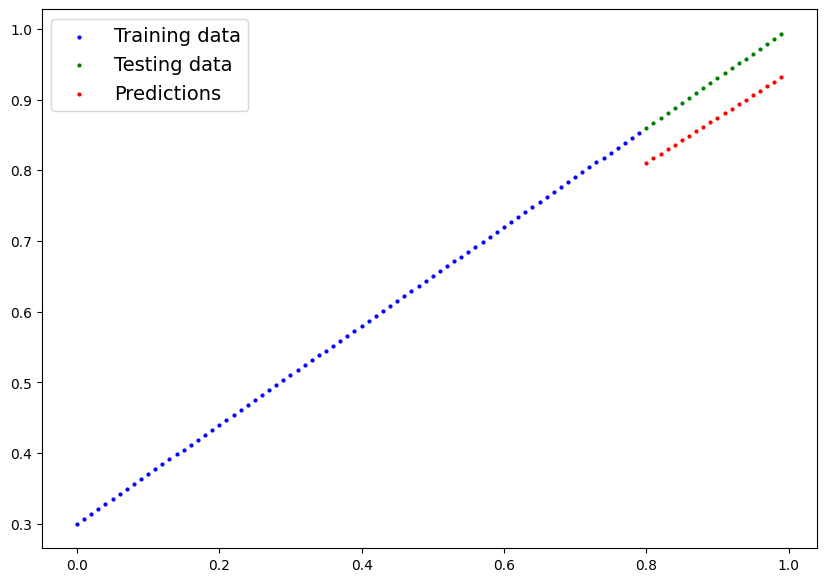

In [152]:
model_2.eval()
with torch.inference_mode():
  y_preds=model_2(x_test_re)

# plot data and predictions

plot_predictions(train_data=x_train_re.cpu(),train_labels=y_train_re.cpu(),test_data=x_test_re.cpu(),test_labels=y_test_re.cpu(),predictions=y_preds.cpu())

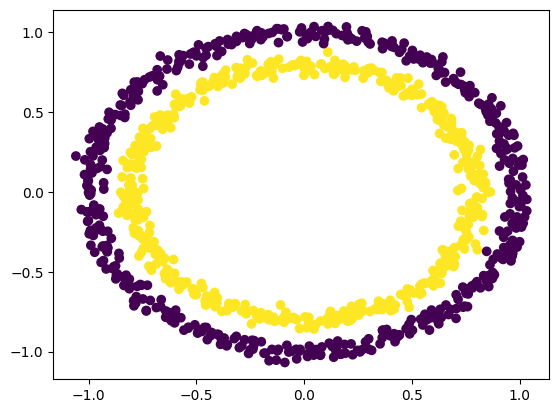

In [153]:
import matplotlib.pyplot as plt
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [154]:
x,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [155]:
# turn data into tensors
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [156]:
x,y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [157]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# build model with non linearlity

In [158]:
from torch import nn
class circlemodelv2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()


  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3=circlemodelv2().to(device)

In [159]:
model_3

circlemodelv2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [160]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)


In [161]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

epochs=1000
for epoch in range(epochs):
  model_3.train()
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)


# print out whats happening

  if epoch%100==0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f} | Acc  : {acc:.2f} Test Loss :{test_loss:.4f} Test Acc : {test_acc:.2f}%")

Epoch : 0 | Loss : 0.6929 | Acc  : 50.00 Test Loss :0.6932 Test Acc : 50.00%
Epoch : 100 | Loss : 0.6912 | Acc  : 52.88 Test Loss :0.6910 Test Acc : 52.50%
Epoch : 200 | Loss : 0.6898 | Acc  : 53.37 Test Loss :0.6894 Test Acc : 55.00%
Epoch : 300 | Loss : 0.6879 | Acc  : 53.00 Test Loss :0.6872 Test Acc : 56.00%
Epoch : 400 | Loss : 0.6852 | Acc  : 52.75 Test Loss :0.6841 Test Acc : 56.50%
Epoch : 500 | Loss : 0.6810 | Acc  : 52.75 Test Loss :0.6794 Test Acc : 56.50%
Epoch : 600 | Loss : 0.6751 | Acc  : 54.50 Test Loss :0.6729 Test Acc : 56.00%
Epoch : 700 | Loss : 0.6666 | Acc  : 58.38 Test Loss :0.6632 Test Acc : 59.00%
Epoch : 800 | Loss : 0.6516 | Acc  : 64.00 Test Loss :0.6476 Test Acc : 67.50%
Epoch : 900 | Loss : 0.6236 | Acc  : 74.00 Test Loss :0.6215 Test Acc : 79.00%


In [162]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[: 10],y_test[: 10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

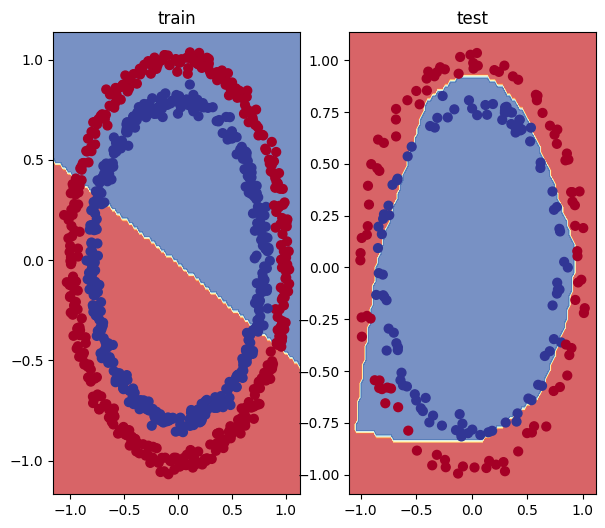

In [163]:
plt.figure(figsize=(7,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

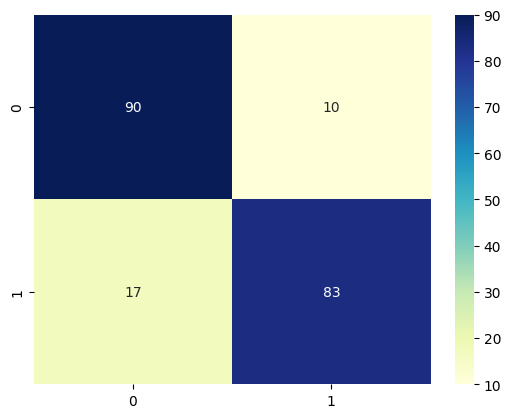

In [164]:
y_test_np = y_test.cpu().numpy()
test_pred_np = test_pred.cpu().numpy()
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
cf= confusion_matrix(y_test_np, test_pred_np)
sns.heatmap(cf,annot=True,cmap="YlGnBu")
plt.show()

In [165]:
print(classification_report(y_test_np, test_pred_np))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       100
         1.0       0.89      0.83      0.86       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



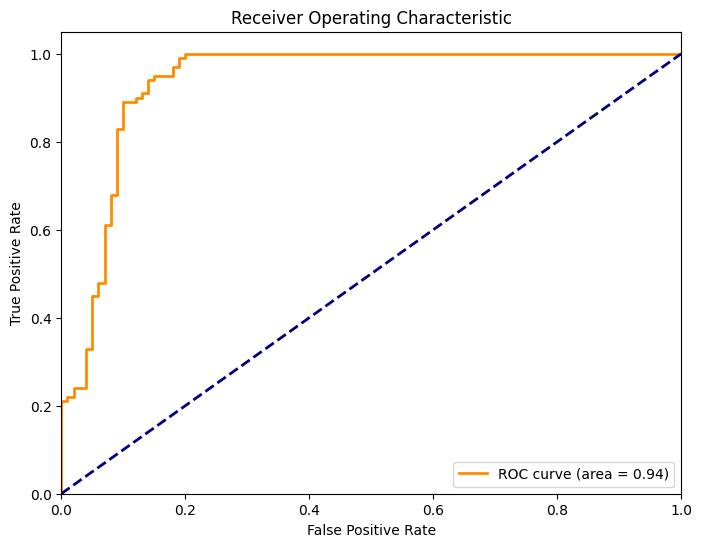

In [166]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_np, test_logits.cpu().detach().numpy())


# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# replicating non linear activation functions

In [167]:
a=torch.arange(-10,10,0.1,dtype=torch.float32)
a

tensor([-1.0000e+01, -9.9000e+00, -9.8000e+00, -9.7000e+00, -9.6000e+00,
        -9.5000e+00, -9.4000e+00, -9.3000e+00, -9.2000e+00, -9.1000e+00,
        -9.0000e+00, -8.9000e+00, -8.8000e+00, -8.7000e+00, -8.6000e+00,
        -8.5000e+00, -8.4000e+00, -8.3000e+00, -8.2000e+00, -8.1000e+00,
        -8.0000e+00, -7.9000e+00, -7.8000e+00, -7.7000e+00, -7.6000e+00,
        -7.5000e+00, -7.4000e+00, -7.3000e+00, -7.2000e+00, -7.1000e+00,
        -7.0000e+00, -6.9000e+00, -6.8000e+00, -6.7000e+00, -6.6000e+00,
        -6.5000e+00, -6.4000e+00, -6.3000e+00, -6.2000e+00, -6.1000e+00,
        -6.0000e+00, -5.9000e+00, -5.8000e+00, -5.7000e+00, -5.6000e+00,
        -5.5000e+00, -5.4000e+00, -5.3000e+00, -5.2000e+00, -5.1000e+00,
        -5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2

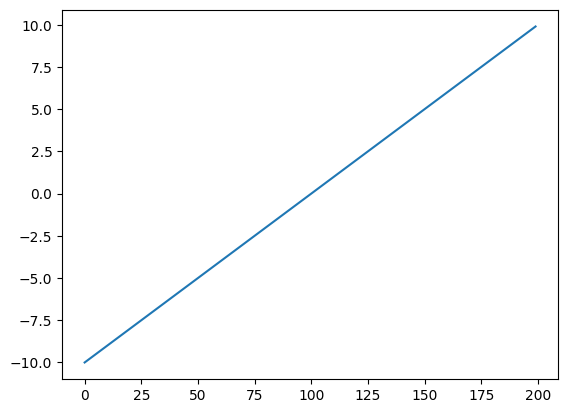

In [168]:
plt.plot(a)

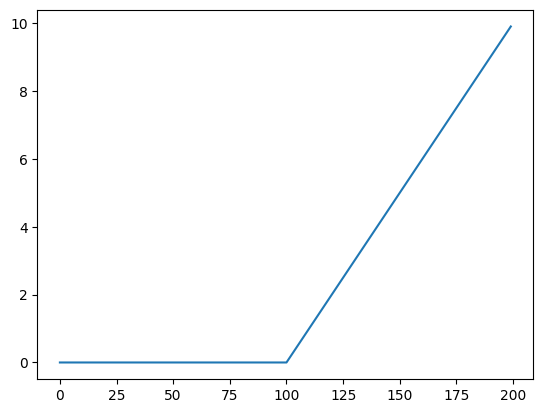

In [169]:
plt.plot(torch.relu(a))

In [170]:
def relu(x:torch.Tensor)->torch.Tensor:

  return torch.maximum(torch.tensor(0),x)
relu(a)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000,
        0.8000, 0.9000, 1.0000, 1.1000, 

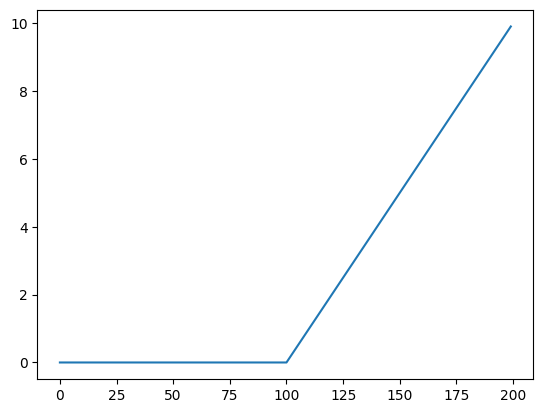

In [171]:
plt.plot(relu(a))

In [172]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

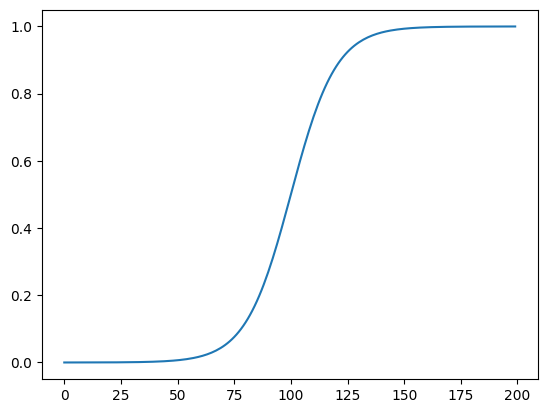

In [173]:
plt.plot(torch.sigmoid(a))

# multiclass classification

In [174]:
from sklearn.datasets import make_blobs

In [175]:
num_class=4
num_feature=2
random_seed=42

x_blob,y_blob=make_blobs(n_samples=1000,n_features=num_feature,centers=num_class,cluster_std=1.5,random_state=random_seed)

In [176]:
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

In [177]:
print(x_blob)
print("*****************************************************************")
print(y_blob)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        ...,
        [ 3.2158,  5.9217],
        [-7.7939, -7.1606],
        [-9.6816,  7.0097]])
*****************************************************************
tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3, 3, 3,
        1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3, 1, 3, 0, 1,
        3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0, 2, 2, 1, 0, 3, 0,
        1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2, 0, 0, 0, 0, 1, 1, 3, 1,
        3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1,
        0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2, 1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3,
        3, 1, 1, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2,
        3, 2, 1, 0, 0, 1, 0, 3, 2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0,
        1, 1, 0, 3, 2, 2, 2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0,
        2, 0, 3, 1, 3, 3, 2, 0, 

In [178]:
X_train, X_test, y_train, y_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state=42)

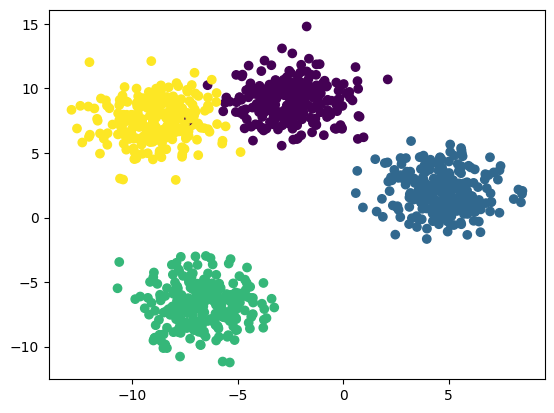

In [179]:
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob)
plt.show()

# Create Multiclass model

In [180]:
class MultiClassModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer=nn.Sequential(
                                    nn.Linear(in_features=input_features,out_features=hidden_units),
                                    nn.ReLU(),
                                    nn.Linear(in_features=hidden_units,out_features=hidden_units),
                                    nn.ReLU(),
                                    nn.Linear(in_features=hidden_units,out_features=output_features))



  def forward(self,x):
    return self.linear_layer(x)


model_4=MultiClassModel(input_features=2,output_features=4,hidden_units=8).to(device)


In [181]:
model_4

MultiClassModel(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [182]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_4.parameters(),lr=0.1)

In [183]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_test.to(device))
y_logits[: 10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [184]:
y_pred_prob=torch.softmax(y_logits,dim=1)

In [185]:
torch.max(y_pred_prob[0])

tensor(0.3244, device='cuda:0')

In [186]:
y_preds=torch.argmax(y_pred_prob,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

# build training loop

In [187]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=100
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits=model_4(X_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_preds)

  if epoch%10==0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f} | Acc : {acc:.2f}% | Test Loss : {test_loss:.4f} | Test Acc : {test_acc:.2f}%")




Epoch : 0 | Loss : 1.1588 | Acc : 40.38% | Test Loss : 1.0755 | Test Acc : 48.00%
Epoch : 10 | Loss : 0.6448 | Acc : 96.75% | Test Loss : 0.6607 | Test Acc : 97.50%
Epoch : 20 | Loss : 0.4254 | Acc : 98.50% | Test Loss : 0.4307 | Test Acc : 100.00%
Epoch : 30 | Loss : 0.2529 | Acc : 99.12% | Test Loss : 0.2451 | Test Acc : 99.50%
Epoch : 40 | Loss : 0.1123 | Acc : 99.25% | Test Loss : 0.1023 | Test Acc : 99.50%
Epoch : 50 | Loss : 0.0663 | Acc : 99.25% | Test Loss : 0.0585 | Test Acc : 99.50%
Epoch : 60 | Loss : 0.0507 | Acc : 99.25% | Test Loss : 0.0429 | Test Acc : 99.50%
Epoch : 70 | Loss : 0.0430 | Acc : 99.25% | Test Loss : 0.0349 | Test Acc : 99.50%
Epoch : 80 | Loss : 0.0384 | Acc : 99.25% | Test Loss : 0.0299 | Test Acc : 99.50%
Epoch : 90 | Loss : 0.0352 | Acc : 99.25% | Test Loss : 0.0266 | Test Acc : 99.50%


Epoch : 0 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 10 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 20 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 30 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 40 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 50 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 60 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 70 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 80 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 90 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%


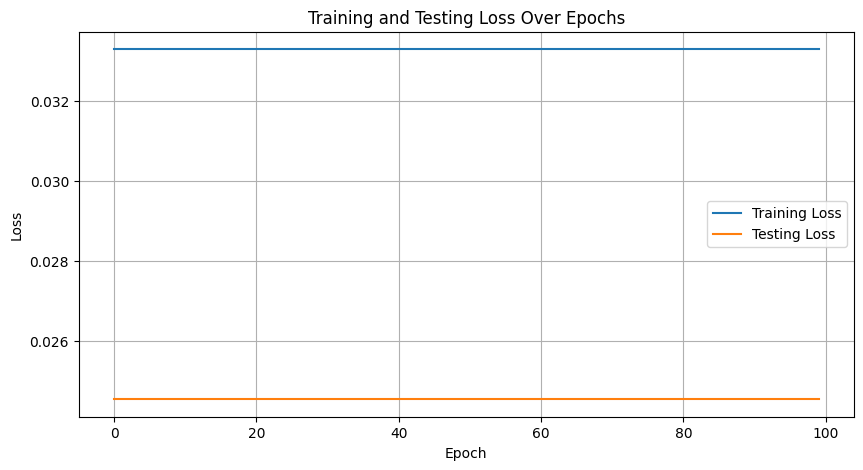

In [188]:
import torch
import matplotlib.pyplot as plt

# Initialize empty lists to store loss values
train_losses = []
test_losses = []

# ...

for epoch in range(epochs):
    #

    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss:.4f} | Acc : {acc:.2f}% | Test Loss : {test_loss:.4f} | Test Acc : {test_acc:.2f}%")

    # Append loss values to the lists
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

# Plot the training and testing loss
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss Over Epochs')
plt.grid(True)
plt.show()


Epoch : 0 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 10 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 20 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 30 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 40 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 50 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 60 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 70 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 80 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%
Epoch : 90 | Loss : 0.0333 | Acc : 99.25% | Test Loss : 0.0245 | Test Acc : 99.50%


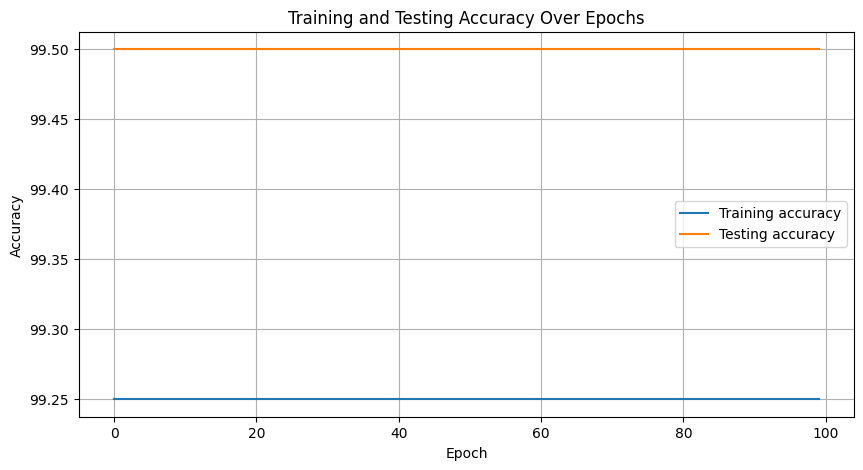

In [189]:
import torch
import matplotlib.pyplot as plt

# Initialize empty lists to store accuracy values
train_accuracy = []
test_accuracy = []

# ...

for epoch in range(epochs):
    # ...

    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss:.4f} | Acc : {acc:.2f}% | Test Loss : {test_loss:.4f} | Test Acc : {test_acc:.2f}%")

    # Append accuracy values to the lists
    train_accuracy.append(acc)
    test_accuracy.append(test_acc)

# Plot the training and testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_accuracy, label='Training accuracy')
plt.plot(range(epochs), test_accuracy, label='Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy Over Epochs')
plt.grid(True)
plt.show()


# predictions

In [190]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_test)

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [191]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[: 10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [192]:
y_test[: 10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [193]:
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds[: 10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

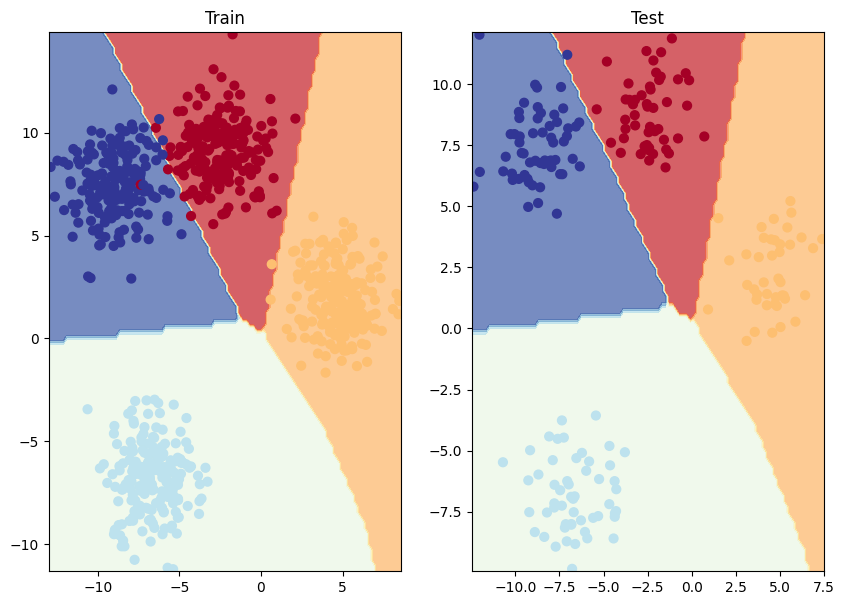

In [194]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_test,y_test)

In [195]:
!pip install torchmetrics

In [201]:
from torchmetrics import Accuracy

num_classes = 4  # Replace with the actual number of classes in your dataset
accuracy_torch = Accuracy(task="multiclass", num_classes=num_classes).to(device)
accuracy_torch(y_preds, y_test)


tensor(0.9950, device='cuda:0')